In [1]:
from uuid import uuid4

import torch
from torchvision import datasets
from torchvision import transforms

import syft as sy

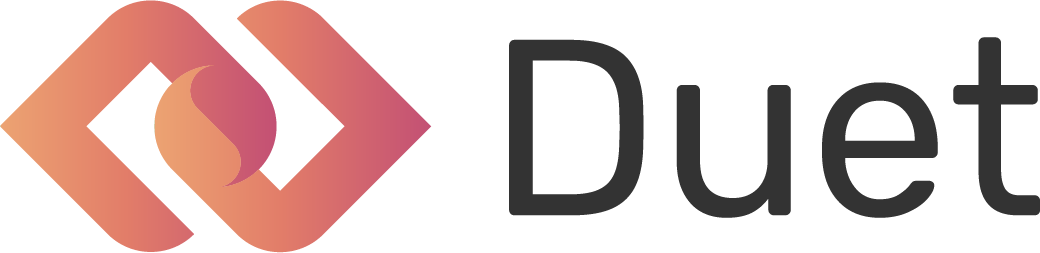

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!



In [2]:
duet = sy.duet(loopback=True)

---

## Load data

We use a utility function to split the MNIST dataset in two: left and right halves.
Data owner 1 owns the left halves of the images.
In practice, DO1 would already have this dataset, so splitting would not be necessary.

In [3]:
def split_data(dataset, worker_list=None, n_workers=2):

    if worker_list is None:
        worker_list = list(range(0, n_workers))
            
    #counter to create the index of different data samples
    idx = 0 
    
    #dictionary to accomodate the split data
    dic_single_datasets = {}
    for worker in worker_list: 
        """
        Each value is a list of three elements, to accomodate, in order: 
        - data examples (as tensors)
        - label
        - index 
        """
        dic_single_datasets[worker] = [] 

    """
    Loop through the dataset to split the data and labels vertically across workers. 
    Splitting method from @abbas5253: https://github.com/abbas5253/SplitNN-for-Vertically-Partitioned-Data/blob/master/distribute_data.py
    """
    label_list = []
    index_list = []
    index_list_UUID = []
    for tensor, label in dataset:
        height = tensor.shape[-1]//len(worker_list)
        i = 0
        uuid_idx = uuid4()
        for worker in worker_list[:-1]: 
            dic_single_datasets[worker].append(tensor[:, :, height * i : height * (i + 1)])
            i += 1
            
        #add the value of the last worker / split
        dic_single_datasets[worker_list[-1]].append(tensor[:, :, height * (i) : ])
        label_list.append(torch.Tensor([label]))
        index_list_UUID.append(uuid_idx)
        index_list.append(torch.Tensor([idx]))
        
        idx += 1
        
    return dic_single_datasets, label_list, index_list, index_list_UUID

In [4]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('mnist', download=True, train=False, transform=transform)

In [5]:
img, _, _, _ = split_data(trainset)
img = torch.cat(img[0][:25_000])  # get the first split of the data
img_rshp = img.view(img.shape[0], -1)
print(img_rshp.shape)

In [6]:
val_img, _, _, _ = split_data(valset)
val_img = torch.cat(val_img[0][:5_000])
val_img_rshp = val_img.view(val_img.shape[0], -1)
print(val_img_rshp.shape)

torch.Size([5000, 392])


---

## Send to the data scientist

DS can now use pointers to the data to train a model.
The DS **cannot** access the raw data.

In [7]:
img_rshp.send(duet, searchable=True, tags=["flatten"], description="flattened")
val_img_rshp.send(duet, searchable=True, tags=["flatten_val"], description="flattened validation data")

In [8]:
duet.requests.add_handler(action="accept", tags=[""])

[2021-03-11T09:23:49.039513+0000][CRITICAL][logger]][47803] You are not Authorized to access this service
[2021-03-11T09:23:49.039843+0000][CRITICAL][logger]][47803] You are not Authorized to access this service
[2021-03-11T09:23:49.040449+0000][CRITICAL][logger]][47803] You are not Authorized to access this service
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/nest_asyncio.py", line 199, in run
    ctx.run(self._callback, *self._args)
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py", line 62, in _callback
   

[2021-03-11T09:24:59.352133+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b5ca58fb30144b0d830b8a657d030c4e>.
[2021-03-11T09:24:59.653376+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0cd2373c5cb5406188ebefa2cea5e27b>.
[2021-03-11T09:24:59.949858+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c23e4f07097b4933b961dfeb60743e9d>.
[2021-03-11T09:25:00.241330+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7eabbdc9b4341c6b0d77874d5666db7>.
[2021-03-11T09:25:00.541899+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 57fdec68ec12415d9756c6a2ef14df97>.
[2021-03-11T09:25:00.842328+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34a783bc1bd24f0

[2021-03-11T09:25:13.969506+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5fa98e63330443849fb4686b243f40b1>.
[2021-03-11T09:25:14.267086+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0b29ab311ad34124bbecff885f58f2f9>.
[2021-03-11T09:25:14.573297+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 818a608d6002477197623caec51b6158>.
[2021-03-11T09:25:14.881281+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 974fc90894514319adcead1db0200467>.
[2021-03-11T09:25:15.254896+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7addf70ccd914a02a0f265f0a64abb07>.
[2021-03-11T09:25:15.536584+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f907f781ed7f4c4

[2021-03-11T09:25:28.920140+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d8a43562ae584e01b1275f416b1fbd24>.
[2021-03-11T09:25:29.217547+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9e38c17a50014cf6bdc230cbe18c2e28>.
[2021-03-11T09:25:29.516429+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4413bdb8a6214ef3be5a4f55bcdda86c>.
[2021-03-11T09:25:29.820557+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 367132e8bcda4e2694fbb76be37ae8df>.
[2021-03-11T09:25:30.129848+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 19cc4387a8334fe28a046151237c4c9f>.
[2021-03-11T09:25:30.429884+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3ce9e9388b104f8

[2021-03-11T09:25:43.620388+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 120afb3a086f4fa68a293652bf9bdf12>.
[2021-03-11T09:25:43.917990+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 89c00b4ade984b98a1bee93405caeb24>.
[2021-03-11T09:25:44.232723+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 49bf5f78d7b24b9da5501df523be26d2>.
[2021-03-11T09:25:44.517700+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8b88c54fac3344d5931cb398642d81de>.
[2021-03-11T09:25:44.840228+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4f1efffbb5c94a71b29b93e9a7e73bf1>.
[2021-03-11T09:25:45.122472+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd3df68f803e419

[2021-03-11T09:25:58.711059+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2ad3742572b145c0b6aeb1a00a26840f>.
[2021-03-11T09:25:58.979942+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 275960b6eac04215904059db5b8e0557>.
[2021-03-11T09:25:59.230676+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 22bafa52708b40bc9d83e6431ac13c13>.
[2021-03-11T09:25:59.504453+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e27b43881ad044058b2f0a3045e0aae2>.
[2021-03-11T09:25:59.772778+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fd0631606aac4d299d44650aa2a7a270>.
[2021-03-11T09:26:00.045756+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6deb6cb1210f46b

[2021-03-11T09:26:15.059612+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3f599abc17d4090a649920a7c0ef35a>.
[2021-03-11T09:26:15.345884+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 89b5a6dfdd04453a8a52bff0101561e1>.
[2021-03-11T09:26:15.642189+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 01199bd260e9414dbf119ad5f1cf15aa>.
[2021-03-11T09:26:15.938981+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9534697b549340b8bb05a4721a9fbad1>.
[2021-03-11T09:26:16.237844+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1718239ac54949d89ca1290c81cc2b63>.
[2021-03-11T09:26:16.531592+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3602de6494a4d5

[2021-03-11T09:26:29.619026+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e4d35db6d8aa45459f285f1a3ca40042>.
[2021-03-11T09:26:29.916119+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9561af30076142be9ad11eeae5b7740c>.
[2021-03-11T09:26:30.208394+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b342117ac6947a8906fef9f622eb35a>.
[2021-03-11T09:26:30.499825+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8230b701cfd46589b655836ffb3d1ae>.
[2021-03-11T09:26:30.807970+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bdc44ca9f15944a288683e497bd9b986>.
[2021-03-11T09:26:31.103127+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c278f319623945a

[2021-03-11T09:26:44.176270+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d84f2724239540329975eca38df4f899>.
[2021-03-11T09:26:44.471808+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2134a8794a414a6ba0d56384b061329d>.
[2021-03-11T09:26:44.785785+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 023670830e54466dbe4f8cf146888241>.
[2021-03-11T09:26:45.092752+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 52181bf0dc5449e48121887a860fbe95>.
[2021-03-11T09:26:45.389924+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ae815fcec351495f9ae45922824c9db6>.
[2021-03-11T09:26:45.678884+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a089809b94864d4

[2021-03-11T09:26:58.905978+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc503c6563594885bd1b32d6ff57e834>.
[2021-03-11T09:26:59.205220+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dbe5c82c06b24bafa10fb0696da45c23>.
[2021-03-11T09:26:59.498480+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 51d683cce89e4ae9a5a0657345b5faf7>.
[2021-03-11T09:26:59.808954+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 91bb2b4b37bf4c4c98b74cc2296ece0a>.
[2021-03-11T09:27:00.114855+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8aa4365723404642a4c3b805d74a0185>.
[2021-03-11T09:27:00.412309+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c842d7b2bbb64f8

[2021-03-11T09:27:14.937224+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fc0bfcdd4b6d4e0eb133e2a19739aad9>.
[2021-03-11T09:27:15.218662+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2426c425857e4fd2b71c7a5c15195038>.
[2021-03-11T09:27:15.483511+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6df87fc699a94aae8d8d76003e8bea89>.
[2021-03-11T09:27:15.748539+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b74b4d9b0a444cc1ab91bdddbb0a2205>.
[2021-03-11T09:27:16.024723+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b70303d943734055b508af867264a5da>.
[2021-03-11T09:27:18.534663+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 20a4eb55e4b8417

[2021-03-11T09:27:31.652515+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e97a7d5292c84b3aa39fb7a1703edc88>.
[2021-03-11T09:27:31.962717+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8dee54d74e0449d9e2afcb8adf6dc62>.
[2021-03-11T09:27:32.269333+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e477d45c7f14f70b9f086f1e781c5c1>.
[2021-03-11T09:27:32.568826+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 36113309466d45f9a38f471f0cf2200d>.
[2021-03-11T09:27:32.872073+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f797fb9d1ec46b1bfc178ecfd3958fb>.
[2021-03-11T09:27:33.178157+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8ae48b61dcb74d1

[2021-03-11T09:27:46.103079+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 20aa6f12ed5e4a69854e12048b0f0a6f>.
[2021-03-11T09:27:46.390114+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e1f42e5d06f346e391335b56a5ee15d2>.
[2021-03-11T09:27:46.685156+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e254948e8bf1435bb2711f120bc05e52>.
[2021-03-11T09:27:46.980003+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6b3dbb40bc22405299ca755e0bae4ede>.
[2021-03-11T09:27:47.256140+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 59bb18bfc25449abbcc749260d13dfb3>.
[2021-03-11T09:27:47.554681+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1ad6db6bd7434f2

[2021-03-11T09:28:00.873300+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ff45e42ea9174e6384593728369352d1>.
[2021-03-11T09:28:01.178954+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 00e13996663344f08f80ad228ed52161>.
[2021-03-11T09:28:01.468205+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 72ca053533f04227a8ffdbe2ccfe7623>.
[2021-03-11T09:28:01.769199+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dabe962e0e0b4f23a9bfc5ef8809d955>.
[2021-03-11T09:28:02.073745+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7d99e6388694b3780bbba1a5fc70c86>.
[2021-03-11T09:28:02.379353+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dd4360148ae84a7

[2021-03-11T09:28:15.336458+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b9a10b182b8f494294442b8c990c9fd2>.
[2021-03-11T09:28:15.645983+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 51ef6bbfd06d400eb6bae2d7114f1d12>.
[2021-03-11T09:28:15.955546+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3fb843133d44de3afa92fe7ecccb392>.
[2021-03-11T09:28:16.251443+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39c4d8d98cfa46a7bc6c17da77e54505>.
[2021-03-11T09:28:16.543084+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a26a05cce3d844feaea3b4e70f5c13e4>.
[2021-03-11T09:28:19.045734+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 84629ebd14fb470

[2021-03-11T09:28:32.333428+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: edd7502a67374d01b160c82aad207315>.
[2021-03-11T09:28:32.625529+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8fd8a01005f945c7816f1936562da658>.
[2021-03-11T09:28:32.936604+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7b43789b15bc4d239dee0cd5c7183620>.
[2021-03-11T09:28:33.234250+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 16a78ed8fdd2494b8212102762291189>.
[2021-03-11T09:28:33.547081+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8c8ad82054904976b9e034fbf3cd76d7>.
[2021-03-11T09:28:33.830170+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5c6aaef139f3488

[2021-03-11T09:28:46.845937+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5109efce72564986b2621b274a07e8d1>.
[2021-03-11T09:28:47.146259+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de2b6d123dfc4f9f93559f662f5d4444>.
[2021-03-11T09:28:47.454170+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 597e267244e2473cbe908387d86622a5>.
[2021-03-11T09:28:47.761505+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 747a4c20693c4f248f1c221dead0149e>.
[2021-03-11T09:28:48.055624+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7a335da7fb84e5e925c41e9340731ef>.
[2021-03-11T09:28:48.352050+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 924814454976499

[2021-03-11T09:29:01.445355+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc6fc40d914b442c975ab73d89402f56>.
[2021-03-11T09:29:01.730523+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 720e8e307ee7439291ac584873e951fc>.
[2021-03-11T09:29:02.030746+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7424c8c62e444f9595f90271825604bf>.
[2021-03-11T09:29:02.315924+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 939b302873144ec681b38dce3e914865>.
[2021-03-11T09:29:02.605897+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 07a92efd7fec48428a9263a279884d91>.
[2021-03-11T09:29:02.897079+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7c851c9f38334b7

[2021-03-11T09:29:15.840528+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92aebf0f39b24a33b422a58212eef856>.
[2021-03-11T09:29:16.131261+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7e0fca1f676487db4b39da7b3b63609>.
[2021-03-11T09:29:16.437166+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a72fc878ed34475a40ad4885bc4c42b>.
[2021-03-11T09:29:16.738543+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 43d8ff46acd34e2b8125c112343e0533>.
[2021-03-11T09:29:17.042644+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: adfc51195fbd4b1ebd34e97a4093c7a2>.
[2021-03-11T09:29:17.346993+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dcd22ce512974f0

[2021-03-11T09:29:31.537834+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a4aea555bc84da8a1662c19909dcef5>.
[2021-03-11T09:29:31.804397+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81105cf721ab497abf717bb75b9c8309>.
[2021-03-11T09:29:32.083909+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1f4fe01f741f4976814a9a44fa32577a>.
[2021-03-11T09:29:32.355013+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6870ce6d40934daea3b46710f377866c>.
[2021-03-11T09:29:32.625727+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d9458e45dd2d488cbb803dfdfcaa8dc0>.
[2021-03-11T09:29:32.886481+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1c6bb8a09a3a4eb

[2021-03-11T09:29:47.298160+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f1017abb096943838e55f73e64c2bde5>.
[2021-03-11T09:29:47.603187+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0bce27e3e9ec4ebd9981014289b2d695>.
[2021-03-11T09:29:47.898754+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1cd1822127294772b3b34c177fa89225>.
[2021-03-11T09:29:48.186646+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3783bcc81f074c6da05883d3eec6f115>.
[2021-03-11T09:29:48.481736+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7d029a6658064f92a269824de270f138>.
[2021-03-11T09:29:48.749737+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e0510f0acbf24a4

[2021-03-11T09:30:01.785534+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a367e396ea44e0bbb7297eff214e3ca>.
[2021-03-11T09:30:02.092224+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3fef4180a13491ca67a1f099f9077b5>.
[2021-03-11T09:30:02.401878+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e5f705691174918b518858812ba6e14>.
[2021-03-11T09:30:02.702011+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aa4094cf4d1c434e8e8c1f62d0f72bad>.
[2021-03-11T09:30:02.986587+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f114f69a115a4790b76befcc0d6dea80>.
[2021-03-11T09:30:03.291130+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: daf74e2b1ffe4d2

[2021-03-11T09:30:16.437236+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e95de10a2224643a178566eb1a43bef>.
[2021-03-11T09:30:16.742662+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: db9d043a835b4d35a82a425bd8afa38d>.
[2021-03-11T09:30:17.048444+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dc5e928fdfa74cb7babcef36d522548d>.
[2021-03-11T09:30:17.342881+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea5d937a693f467ab925f7ef7ee75e0a>.
[2021-03-11T09:30:17.640564+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3eacbf47435b426eae80f9502ef0d2e3>.
[2021-03-11T09:30:17.948375+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3377bd6cd9464e4

[2021-03-11T09:30:31.081579+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1c6af0f2f0a74d2fb973dca49afe46d6>.
[2021-03-11T09:30:31.368122+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2132f95eb6204ecc9884c1b26e69401c>.
[2021-03-11T09:30:31.665621+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 750f53268ab446959c3d0137aab47e34>.
[2021-03-11T09:30:31.971582+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 625607335cd54ed89ca6a91262851366>.
[2021-03-11T09:30:32.277021+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 656cbda4c16d45049fc676d91a05b82b>.
[2021-03-11T09:30:32.579775+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c6ff8e58ea104cd

[2021-03-11T09:30:46.661285+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 16c7451ba8e34ccd81637399180c73a4>.
[2021-03-11T09:30:46.941878+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61fa52a44e97412898cd39b5e71268e7>.
[2021-03-11T09:30:47.219787+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4e01ff4b27034c2cb515956a538742ed>.
[2021-03-11T09:30:47.498148+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6d67c61bf23c45bc89473405e3c54bb3>.
[2021-03-11T09:30:47.749412+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 57e583b2691a4948adf7a3a604306b54>.
[2021-03-11T09:30:48.015454+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc1d8c712a9a4a6

[2021-03-11T09:31:01.920356+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c5f82459a7ba49f4a8eac55b986f1990>.
[2021-03-11T09:31:02.218138+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3357dcab6304ca5a5d8fcb6e2b81155>.
[2021-03-11T09:31:02.525293+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 97e1f8ddeba04913a6a862fe4ec71c8c>.
[2021-03-11T09:31:02.829314+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 82cf8c66fe294e649df24ba395f191e8>.
[2021-03-11T09:31:03.133079+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0c42e1587569484793467513c17bba2a>.
[2021-03-11T09:31:03.427773+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 11fdf6323189461

[2021-03-11T09:31:16.614526+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 679e9df733424d26b4d5817d0750a87d>.
[2021-03-11T09:31:16.923788+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8e5d9dcb20d04cc881c2a0b7ce8cc89f>.
[2021-03-11T09:31:17.232474+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e3b41fea3f424329a66b4447f139edb4>.
[2021-03-11T09:31:17.544390+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fc7314ccdf924effa52f171bc7bc9463>.
[2021-03-11T09:31:17.852898+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 38bcae81048945deb44888c291b6f689>.
[2021-03-11T09:31:18.150304+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 344058e2b87d46e

[2021-03-11T09:31:31.210975+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a05cb817d9b4d148b67da44e05221a1>.
[2021-03-11T09:31:31.519146+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0fb937d313f445a1b764fe4afb60e728>.
[2021-03-11T09:31:31.814782+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 00b4723517fa41008289d6a109ef89d4>.
[2021-03-11T09:31:32.111989+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dc51801670894ce2a7ab758d4f1302fe>.
[2021-03-11T09:31:32.410792+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f7ff9b42a5aa48cc81fb21777e924089>.
[2021-03-11T09:31:32.692720+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 950f90992f44457

[2021-03-11T09:31:45.369276+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b5fd99cbb49490abf96dc86aafbf6d5>.
[2021-03-11T09:31:45.678002+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3a60b6cb8b024d9b9495bc918003d1c7>.
[2021-03-11T09:31:45.986905+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3da76ed27997435385fd391df653f943>.
[2021-03-11T09:31:46.288027+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea0bfa8ed41b4231865a659e7776cb3c>.
[2021-03-11T09:31:46.592597+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd7a9284eb024f7a8d491bd219a03845>.
[2021-03-11T09:31:46.883156+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bf819ea138874a6

[2021-03-11T09:32:01.680797+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 86e569c353814578ae3353bc12c77e46>.
[2021-03-11T09:32:01.954881+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7cf1245267543beb1490d3cab752546>.
[2021-03-11T09:32:02.220040+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 00ca808908d64c7a95f0d6baeb338a95>.
[2021-03-11T09:32:02.485646+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4375118aa1744c069e6c1faf27671f36>.
[2021-03-11T09:32:02.753479+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1bfea815493a4c0aa31678fb51d0a117>.
[2021-03-11T09:32:03.015059+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 465dc7774df4494

[2021-03-11T09:32:18.061538+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 85cd014e4d2a4c97984183b416c41ae4>.
[2021-03-11T09:32:18.358822+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a6eb40b9a7394dad81bb12ce63d34b86>.
[2021-03-11T09:32:18.667526+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d7f831d64d2b46e4be775bf278713858>.
[2021-03-11T09:32:18.973988+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b71a647cf9f4599893c07fd6d14359f>.
[2021-03-11T09:32:19.282347+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 275e40712e51497b8be68da33172f7e4>.
[2021-03-11T09:32:19.571355+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0a9b7022bd66498

[2021-03-11T09:32:32.712076+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b111506183ab4552a676d14a834865b3>.
[2021-03-11T09:32:32.992839+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9b677d5abd514b33b82d695841f87fd0>.
[2021-03-11T09:32:33.283744+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fcb6b7fe98ba4849a96065954dd03f4f>.
[2021-03-11T09:32:33.567681+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9289edda8b72469db481cbcd7e5d118a>.
[2021-03-11T09:32:33.852192+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 878ae54986d84c6e863c08c5677f4051>.
[2021-03-11T09:32:34.153336+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3920000bd1e14a2

[2021-03-11T09:32:46.985441+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc756743223c4709ad1d5a2f758a30e2>.
[2021-03-11T09:32:47.283122+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9f09e6797bdb48288d4e7fd69cd7ff3b>.
[2021-03-11T09:32:47.573876+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d36ebe72c4874b0cb0d9c00394d5eb34>.
[2021-03-11T09:32:47.853008+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fcf9cfbd36b44052a37c3a0341b99cb5>.
[2021-03-11T09:32:48.136451+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34ed3f3305804e68be527c82e829f345>.
[2021-03-11T09:32:48.419610+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ec88b54d186a492

[2021-03-11T09:33:01.375081+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0db8d9b46f4b45e1bb76a8f63d28102a>.
[2021-03-11T09:33:01.681630+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1384f12b55ad404992cd9bba75810b3b>.
[2021-03-11T09:33:01.982724+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3ede853cc21148cda1fea70bbf652136>.
[2021-03-11T09:33:02.291291+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: afda0b15073e4772a041882e03e7a3f5>.
[2021-03-11T09:33:02.586525+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e93041fdbc46409eb52c3d223fe2a91b>.
[2021-03-11T09:33:02.885170+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7ae1ca00adf54f7

[2021-03-11T09:33:17.543713+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 76d4d6f1379442f39a1c1de11584a5d0>.
[2021-03-11T09:33:17.818295+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1d2bd3ee40ce49dcab1171da09cf5783>.
[2021-03-11T09:33:18.093833+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: adaac021970a436fb0920d7e00865ba0>.
[2021-03-11T09:33:18.368337+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 51d8a09afb904b7a98e72d9a6f725ca3>.
[2021-03-11T09:33:18.652429+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4875fdde2bd54ff8b9778d41534c174f>.
[2021-03-11T09:33:18.935653+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7b3efc8b498841a

[2021-03-11T09:33:32.082525+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a1b9b550c5dd4528a86104cb5f8a0b32>.
[2021-03-11T09:33:32.373542+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d556d25adcb1499c84cc580b307cc99b>.
[2021-03-11T09:33:32.689791+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 28149c1928df4b94b3d454946b15fb1a>.
[2021-03-11T09:33:32.989377+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ae5fc93ad58544bd9179f4e3e31fa461>.
[2021-03-11T09:33:33.297433+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3561ffe1e8054efab1a0767543102b63>.
[2021-03-11T09:33:33.591443+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3e2b4d56bb04a0

[2021-03-11T09:33:46.155884+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 52fa2fbfa70c478d962dc0988dd24f7f>.
[2021-03-11T09:33:46.457846+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1bc553d09e5c43808ae01333a813ca25>.
[2021-03-11T09:33:46.749387+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2fa4effc998a4d0b86a50c11d5ff3075>.
[2021-03-11T09:33:47.052069+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b751e902693744b7ba5d4254d2b2387c>.
[2021-03-11T09:33:47.350722+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f43c602ec4b94d3482f113d65ffb863f>.
[2021-03-11T09:33:47.654774+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c25d8c767c3c4a2

[2021-03-11T09:34:00.622555+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7d36a5cab8a24226a09e0d0e0bf9f46a>.
[2021-03-11T09:34:00.931945+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f07eca74627b42ed9e20387d64ed6006>.
[2021-03-11T09:34:01.232613+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7a8d303a8a8a4041aca1e0d087caaf6e>.
[2021-03-11T09:34:01.537633+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 538b026586464d31bda8ce17d71e9ae8>.
[2021-03-11T09:34:01.834304+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f71e1885b4494c9ba25656e0bc09edce>.
[2021-03-11T09:34:02.131064+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 96456b5ee2f44af

[2021-03-11T09:34:15.302036+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fd78f3a82bf24d72938bc92198fdcf7a>.
[2021-03-11T09:34:15.596024+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 88f872b72a114d8aa65d6342ff2ea82b>.
[2021-03-11T09:34:15.893328+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9d3786c80f5467da312ee413125820c>.
[2021-03-11T09:34:16.201239+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c6eaf58423bb45fba6df086750e5c22f>.
[2021-03-11T09:34:16.506415+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3626ad88dd1a4315a13ed89b63feddc3>.
[2021-03-11T09:34:16.806528+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8f556da514b3470

[2021-03-11T09:34:33.394845+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5a5af9f7e7fd4f559edc25d36594d12b>.
[2021-03-11T09:34:33.680177+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 928804726f3147e98c28f0ae14f16c26>.
[2021-03-11T09:34:33.979409+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f6734d815231450e84a0e9041722908e>.
[2021-03-11T09:34:34.274640+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 721b2a0a55ef47109d006ac1ad7d30ca>.
[2021-03-11T09:34:34.567323+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f056ac1ddb6049ad99cdf804b387a625>.
[2021-03-11T09:34:34.871357+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 64546b24954744a

[2021-03-11T09:34:48.113397+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 86c0373c35ed473481ce00343650e15d>.
[2021-03-11T09:34:48.408848+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 50c92ce8380f4e9c88f6e54d958ec269>.
[2021-03-11T09:34:48.706475+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3cf64e81d104fb4ba85587ea0f4de0b>.
[2021-03-11T09:34:48.991780+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 439cc1154a454620be74d495e666f1b3>.
[2021-03-11T09:34:49.268689+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fce93c75573f47c282c2cf86dfdfa0a6>.
[2021-03-11T09:34:49.564082+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 849a4db23a40448

[2021-03-11T09:35:02.530263+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: baf7ff6088be4df988ab9bc232819b56>.
[2021-03-11T09:35:02.832725+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4b60f596c0bb4d8b8e6a64175e2dbfe5>.
[2021-03-11T09:35:03.142519+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c19478c600f0461f873140689ba4cc12>.
[2021-03-11T09:35:03.448365+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8e31ae65f3cb43c795d98446e67aee25>.
[2021-03-11T09:35:03.722883+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eb645dceeb6b4631bb15cc8d82d26feb>.
[2021-03-11T09:35:04.016591+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7ce5b29443664a0

[2021-03-11T09:35:16.975198+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 63a9da6186e54ea7a70823e0faf63213>.
[2021-03-11T09:35:17.274828+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b803fa5c47244068b8c39ac1215eb906>.
[2021-03-11T09:35:17.581183+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7f98992678e349b3a0714d60786afc02>.
[2021-03-11T09:35:17.894593+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d87e8a29e57c4de5b1a7e70c2b2c0f25>.
[2021-03-11T09:35:18.202823+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7ce3ae39406a4946bcb9d07cba094055>.
[2021-03-11T09:35:18.503206+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 31cc97fde66841a

[2021-03-11T09:35:33.786877+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 52a684059bd644b189406f0a9d203ce3>.
[2021-03-11T09:35:34.060471+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 06004f9f32744b5180aea23660dc5074>.
[2021-03-11T09:35:34.336575+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 022235e0640a4b51ad19b00d453c2df6>.
[2021-03-11T09:35:34.621494+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b2d5986e982b46fa8e70b3dfd4155c3c>.
[2021-03-11T09:35:34.897551+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 17860d0f6be74b3bbb337e8077455bca>.
[2021-03-11T09:35:35.180335+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 094ef5b60f3f474

[2021-03-11T09:35:49.083756+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0d1664e7242240f1b6781212bbba5112>.
[2021-03-11T09:35:49.393223+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f30d28c37d6749e882faea7d407483e7>.
[2021-03-11T09:35:49.686375+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9c9405907d074f079fdd6db054564f91>.
[2021-03-11T09:35:49.988620+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5f7a0260beb441d388bf25d52f988c83>.
[2021-03-11T09:35:50.297731+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f0ac97cb5fe049f7b25b9a36ffc81fc5>.
[2021-03-11T09:35:50.601802+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 631f4fdc76bb402

[2021-03-11T09:36:03.401569+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f9c3399712964be1aa6d04f65a83f167>.
[2021-03-11T09:36:03.686061+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6931472be58140879bf4ce9148cae8ba>.
[2021-03-11T09:36:03.984974+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ac827f2078d94d9e9b2ab960f09543d2>.
[2021-03-11T09:36:04.283230+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b36605d14a14e5588aa1b4cafb5d174>.
[2021-03-11T09:36:04.576996+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6cd8cb726d3040a8ac2f67544e244406>.
[2021-03-11T09:36:04.872493+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1236267f33c7494

[2021-03-11T09:36:17.972972+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a0bb4abd39854862bb75d23383c91c6c>.
[2021-03-11T09:36:18.275915+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a642c096e43141cab513ea7215196fd3>.
[2021-03-11T09:36:18.585993+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 49e5cff3e7e0497e8f0673f4eefc51d7>.
[2021-03-11T09:36:18.895047+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8522d8210445455995560f4761d52517>.
[2021-03-11T09:36:19.197432+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e580417072034222a5f7583039d2a339>.
[2021-03-11T09:36:19.498095+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 19f07eeee35f426

[2021-03-11T09:36:32.530459+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 19f9549c09ad48ad93722073f3da5951>.
[2021-03-11T09:36:32.832448+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34377b9607bb4fc2900b53577aeba5f1>.
[2021-03-11T09:36:33.123393+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1ec5f4a29037423bbaea6458586e38d5>.
[2021-03-11T09:36:33.421945+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 93130eaff1f54a0991c6df9b9023c378>.
[2021-03-11T09:36:33.713929+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56db0f42832043baabd62343bd5e3b78>.
[2021-03-11T09:36:33.991293+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 114602f64e634e5

[2021-03-11T09:36:48.697442+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8eba77eb4fb40d782fe00a990e0b6f8>.
[2021-03-11T09:36:48.955488+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ec2dea6ca241421a96143c90d07d951a>.
[2021-03-11T09:36:49.211726+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0df27c508f004bcabd17fbb7b4b9b657>.
[2021-03-11T09:36:49.467409+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 28934cf5509844ff99b112c49970e3be>.
[2021-03-11T09:36:49.724702+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bb67eaf920d040d4934b20fedeeef4fd>.
[2021-03-11T09:36:49.983378+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8c7f8c8bd38e46e

[2021-03-11T09:37:03.344769+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 499548e4cef44c3aa65cb664d92e0194>.
[2021-03-11T09:37:03.634187+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b8d99211dc804bfa9f254c4124d1a28a>.
[2021-03-11T09:37:03.924323+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 31e11513d32143beba253ea7a0fd4491>.
[2021-03-11T09:37:04.228464+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a0f887d97aa14e82a695197e6b16ca11>.
[2021-03-11T09:37:04.523164+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dff7d9cb5fcd4e3ba071c43d24cd54ae>.
[2021-03-11T09:37:04.803313+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 787f962ab22f450

[2021-03-11T09:37:17.844114+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7d10517256e54a2590d6c9b5745f372e>.
[2021-03-11T09:37:18.148442+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b15f5f875654a389fb462d5032648ca>.
[2021-03-11T09:37:18.443451+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fe7f123dd57743198ed8c6798b84c1c0>.
[2021-03-11T09:37:18.753824+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 26590df069c94a2891488e3286352fba>.
[2021-03-11T09:37:19.045990+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de8ade4d46f54c06a38595e3d4980251>.
[2021-03-11T09:37:19.347554+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d6a38367d4d1400

[2021-03-11T09:37:32.418654+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dddf0fbb4a194fec82efdb252eba09e7>.
[2021-03-11T09:37:32.712973+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4f05817a70fc47678d0d1902938517bf>.
[2021-03-11T09:37:33.013584+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 80e95d65b54343a38b57c49166b2793d>.
[2021-03-11T09:37:33.307979+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 64b12cdea572460788056d2e0d24d3ce>.
[2021-03-11T09:37:33.599423+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 722695c1917f48c2b4cda6a26406d9ca>.
[2021-03-11T09:37:33.889472+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9a87e70c84184fe

[2021-03-11T09:37:46.648515+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dd382a9549f14737b4efad1e7be8dd2e>.
[2021-03-11T09:37:46.927172+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7d86cb70030e47968756089f3160d5a1>.
[2021-03-11T09:37:47.221917+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1990a70c284c4aad95ab64556c07c6f0>.
[2021-03-11T09:37:47.510888+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 60df81ba1c9c46d2bf044a17693c21d7>.
[2021-03-11T09:37:47.792022+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4f8a3e9bf79a496fb95ff9d1b4e4ba67>.
[2021-03-11T09:37:48.074569+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c7995b3e63ce4dc

[2021-03-11T09:38:01.784648+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 13fbc9fdb458491ea30ac240c6f34e57>.
[2021-03-11T09:38:02.062303+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2d45a67056284a64bdecde8634d228af>.
[2021-03-11T09:38:02.344815+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 48af281c2523452c9182877a0dfbeab1>.
[2021-03-11T09:38:02.622580+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0d3fccaef3cd40779ec8ba908edb57e3>.
[2021-03-11T09:38:02.895012+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39796c774f5642f78692fd34708e09da>.
[2021-03-11T09:38:03.159983+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a1ed410f5b9548f

[2021-03-11T09:38:18.168340+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 43fab2bf070b49ef94af97c42cc5a52f>.
[2021-03-11T09:38:18.472646+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a986d17de7ce42ea82e8d250206008d6>.
[2021-03-11T09:38:18.763589+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f9ae051e649b4ca79b1c2e10dc358093>.
[2021-03-11T09:38:19.053929+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2bdf2ad77a43454a8c10942bd6011e6e>.
[2021-03-11T09:38:19.335786+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dea4f0944d4e447cae08285c3b25c899>.
[2021-03-11T09:38:19.646539+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ee636ecff8cd4dd

[2021-03-11T09:38:32.727208+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3449888da1a54d129c2fac6ee483c418>.
[2021-03-11T09:38:33.002760+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c4168400ffec4854a9392ac349f590a8>.
[2021-03-11T09:38:33.291778+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 48dee204016e42cd8b96ff78c75fc729>.
[2021-03-11T09:38:33.585577+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 252a1a2c02464012a0641f852cc64796>.
[2021-03-11T09:38:33.901050+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a394fce606494804973b72a211692859>.
[2021-03-11T09:38:34.207182+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 57e01ffb675547e

[2021-03-11T09:38:47.225758+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2135bb0800284cbbb67ef5c77320a2c0>.
[2021-03-11T09:38:47.531119+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5587992ad16b4656ab243769dca22c50>.
[2021-03-11T09:38:47.827968+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6b325d0dcfd0493ab35b921724ef75e4>.
[2021-03-11T09:38:48.127140+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8fa0a7c12aa741b5b40fb58fe8f9a546>.
[2021-03-11T09:38:48.437112+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75d3c510a09e4bd092266187371d0837>.
[2021-03-11T09:38:48.742660+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e045c24729c439

[2021-03-11T09:39:01.947321+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8765ae0507404dd19c4326be088df889>.
[2021-03-11T09:39:02.245713+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b0335dd1c69a446dbe710b1a25dbd034>.
[2021-03-11T09:39:02.539858+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ffe8593627d04b28ae7a6f48c66bd8d7>.
[2021-03-11T09:39:02.841588+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e590c427d178469a9415a00fadcc94d1>.
[2021-03-11T09:39:03.148481+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f28e5b9110dc4e45ae60bb2aa0bb0c28>.
[2021-03-11T09:39:03.448195+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b9867f8fd954435

[2021-03-11T09:39:17.226037+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1261c143e1b840e8866086a32221a091>.
[2021-03-11T09:39:17.486097+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 58940b1fac874eff91436aca15cd9ed8>.
[2021-03-11T09:39:17.754559+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 98be6b1579c14f31b711bdce77e06bce>.
[2021-03-11T09:39:18.035107+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a3691643aaac48f6bb9578ccb35a1abb>.
[2021-03-11T09:39:18.299876+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6b1fa9808ab94f189a03d25291454263>.
[2021-03-11T09:39:18.555290+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7fad93ccb81940e

[2021-03-11T09:39:32.637486+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 82d41298ade34958952f2f84520b22ac>.
[2021-03-11T09:39:32.931966+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 00355737c6dc47a8a4d173b6d230cabb>.
[2021-03-11T09:39:33.239589+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cbe09815f92a4eaf9fca829f1b9e9fa9>.
[2021-03-11T09:39:33.535933+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6ef1129413484354bcfeac39e4ce5a5d>.
[2021-03-11T09:39:33.834736+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 793dccf54a4f48249431d556c45931e1>.
[2021-03-11T09:39:34.129816+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 291267243d044e4

[2021-03-11T09:39:46.744972+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 22a36956f7be49acb3c982a1b63bb491>.
[2021-03-11T09:39:47.028233+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a025d9ef112b4d86806d5f1b615c4e34>.
[2021-03-11T09:39:47.316092+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9b6e216b862c4f12aa6e6dd2caa23833>.
[2021-03-11T09:39:47.596829+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81c15f37474b4a58b1834aa59aa2b800>.
[2021-03-11T09:39:47.874123+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 154e9f27a8c14e0dafbf303134a54a25>.
[2021-03-11T09:39:48.139802+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75dae9cd771d4cd

[2021-03-11T09:40:00.796166+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2489ae8b7f0f48c381547b2d97f4e61e>.
[2021-03-11T09:40:01.100924+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c44d5adf8a2945398093fd968df0ff17>.
[2021-03-11T09:40:01.396323+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34705ab8f17742228e4e3a6aceb6585b>.
[2021-03-11T09:40:01.687922+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e30512fd371c43eba588dec09bdd453e>.
[2021-03-11T09:40:01.979998+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ca2309f2609642dea171f1661e26a13f>.
[2021-03-11T09:40:02.267716+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 49f53894215b449

[2021-03-11T09:40:15.240176+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7a882d8ec12b479b9efd8c220df04b04>.
[2021-03-11T09:40:15.546158+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 35e1a52d70db48b19a96a0bc14be4c6d>.
[2021-03-11T09:40:15.850301+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 03d603ec59b148e39d1d98ceed1bffc7>.
[2021-03-11T09:40:16.130959+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3a404690d2bc443fbe399ea07ca4a6fb>.
[2021-03-11T09:40:16.436256+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a570f01180014fb0a9d6aca478be4f67>.
[2021-03-11T09:40:16.724526+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5aca1336199540d

[2021-03-11T09:40:31.247853+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 05688ee08910423db691fea2f7311392>.
[2021-03-11T09:40:31.504352+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 027dc252114c4541a495ccc1085be326>.
[2021-03-11T09:40:31.787001+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: daef44f62f544946b56dbe2e68b9a1af>.
[2021-03-11T09:40:32.058174+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 58eb694e751f48c1a85d50bcfa1b3b2f>.
[2021-03-11T09:40:34.577990+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3cd292c7ead8438aa410b442bbae3b3f>.
[2021-03-11T09:40:34.870939+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de0a0e30a7e345b

[2021-03-11T09:40:48.061286+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f4ce55118de4cb688bf17e035541af0>.
[2021-03-11T09:40:48.366162+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61cf165560534c5fa2d627b4012bb452>.
[2021-03-11T09:40:48.667143+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e7e0b19e9996436f806f1d2e0ca63b93>.
[2021-03-11T09:40:48.954340+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e82b487834324c70b27119b57b8b7dde>.
[2021-03-11T09:40:49.227277+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de375da5133345e7b1dbc0d59c633923>.
[2021-03-11T09:40:49.529704+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 37855611be6647c

[2021-03-11T09:41:02.445354+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fdccfe24029943ae962dbbb43fae4fc1>.
[2021-03-11T09:41:02.742081+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 117db177590b41bf932654c0012e8ce7>.
[2021-03-11T09:41:03.035038+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1a23299209ed434fa253930634ab9334>.
[2021-03-11T09:41:03.322636+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6345dd486ad7415f81be1be8592d514f>.
[2021-03-11T09:41:03.604999+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4ea437d4b1e745598d0f4b67928ef33e>.
[2021-03-11T09:41:03.887015+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 152632dd793b407

[2021-03-11T09:41:16.972648+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8443858d1a8f4d7db249df472a3bee07>.
[2021-03-11T09:41:17.264973+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e7916dc2a6b34ac79662aaf3d1fa849b>.
[2021-03-11T09:41:17.551675+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 65b5e187c66c49158c6da7094836588d>.
[2021-03-11T09:41:17.825715+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5434b19391484dde9f8ca633e31b94ba>.
[2021-03-11T09:41:18.117655+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 74da351a741949ab92b73faad53e1e37>.
[2021-03-11T09:41:18.419228+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b4b0331e43f0491

[2021-03-11T09:41:31.460401+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bb439f80ba9049458f9e40cbd6a4407d>.
[2021-03-11T09:41:31.746463+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1cd3460f9e874c49ada4d517acecc583>.
[2021-03-11T09:41:32.038764+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: edd95a90f8bc4d5fb6fc9849239af9aa>.
[2021-03-11T09:41:32.338931+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f44d3d1dbe4e40f9bc0b1b699363d600>.
[2021-03-11T09:41:34.829503+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fe11f3cab0394691b0841940f26e1562>.
[2021-03-11T09:41:35.093823+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 180a0a039459427

[2021-03-11T09:41:48.915936+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b72061c647e340dd887335a9f27252b8>.
[2021-03-11T09:41:49.184332+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8c6c011876ef40efb241efb16bdf5989>.
[2021-03-11T09:41:49.466829+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 54d8adbc6674480988ed4ce546738c9f>.
[2021-03-11T09:41:49.749513+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fae0df785d0c48159657a7e1c6fc6616>.
[2021-03-11T09:41:50.033088+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d04748595afe4c5a93cb355506ed17a9>.
[2021-03-11T09:41:50.332169+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 87c81804a9b6451

[2021-03-11T09:42:03.209696+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9f9b3c3b70314f85ada0926e40450738>.
[2021-03-11T09:42:03.514227+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1a9b9193c7694e4383ca5450e0e73b79>.
[2021-03-11T09:42:03.815169+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7d7a364d5d524c5ea4a5597bb713aff5>.
[2021-03-11T09:42:04.111592+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e8ee0705e6154e3f9a01215fbb0e12b1>.
[2021-03-11T09:42:04.420177+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0477a111b68d4f7db8fb2c35e9ddaad4>.
[2021-03-11T09:42:04.728840+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5f4c6cd04fce430

[2021-03-11T09:42:17.828973+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 45aca26aa6ca4fd5bba2f6d2f7372bc3>.
[2021-03-11T09:42:18.121007+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 106aee87b697431e9cf2a26f148031d5>.
[2021-03-11T09:42:18.407902+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 12f7bb95f68a4d36965459346c8bc3a8>.
[2021-03-11T09:42:18.715232+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c944c0a4600d4baa87bb166fb2213939>.
[2021-03-11T09:42:19.021218+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 800d7fb5973c44c2bf2fc49e55693b42>.
[2021-03-11T09:42:19.335388+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8422636acb884da

[2021-03-11T09:42:32.365260+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 825431c398134160901984cb1470c159>.
[2021-03-11T09:42:32.672358+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 918b1df7573340de8daf7b7bb585984a>.
[2021-03-11T09:42:32.984524+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 87fd6705f6b14f67a7d1ae5550ffc983>.
[2021-03-11T09:42:33.283520+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 016e37827c76409293d975c3194145f0>.
[2021-03-11T09:42:33.573622+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6af7cea54a324056800f9ff1598e2b7a>.
[2021-03-11T09:42:33.861030+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a5dfc7d7e4484a8

[2021-03-11T09:42:49.056638+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5a87fd30485f4cc6ba7716f291964447>.
[2021-03-11T09:42:49.320051+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 66eef0db2deb411c90f98cdaf3533e35>.
[2021-03-11T09:42:49.583358+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1566eac0bedd4e2881736f8d0b8d003d>.
[2021-03-11T09:42:49.850100+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 30ad62a1afa444d69409d040cdf4997f>.
[2021-03-11T09:42:50.117349+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f6576713b4c443afad4a00a271e0ef31>.
[2021-03-11T09:42:50.397850+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 27d63ca5c6124e9

[2021-03-11T09:43:04.808420+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81af13e9e3cd487592ef5dff859a5001>.
[2021-03-11T09:43:05.111879+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: acee3496bf0848e2b6d5ab302bd45690>.
[2021-03-11T09:43:05.421858+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b2173ec234aa4e4a81cd6cfa2ce8d21b>.
[2021-03-11T09:43:05.720962+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 465269bb4e474db693e331665853144e>.
[2021-03-11T09:43:05.994976+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f4bba41c6fb043d0935705db2a8e0dc9>.
[2021-03-11T09:43:06.270354+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5ba615da02df40e

[2021-03-11T09:43:19.315363+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9cfe263b1ffc43f4893166de821ec42e>.
[2021-03-11T09:43:19.616712+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fab322fac2ff43bba713eed43f6e3fc1>.
[2021-03-11T09:43:19.911331+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: deb7b782a0d84a58ace0729b2b551c85>.
[2021-03-11T09:43:20.197363+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ef21ed6b083143679378ccd05684cb14>.
[2021-03-11T09:43:20.480653+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5a5e156eb8f741de8a68853021e6540e>.
[2021-03-11T09:43:20.800673+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 646fa677f6fb437

[2021-03-11T09:43:33.919623+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7293452136174b4eb80d1fe513e9164e>.
[2021-03-11T09:43:34.225738+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 23bb31ae3ff8496ba39657d047921d6f>.
[2021-03-11T09:43:34.503801+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ce5acbc96edd4453af26dc9d317904a2>.
[2021-03-11T09:43:34.789992+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e903efa714a74550b62247f80ef2115c>.
[2021-03-11T09:43:35.089625+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f96987e2d444d45a818d662120cd8e2>.
[2021-03-11T09:43:35.379194+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b793bda4ac414a6

[2021-03-11T09:43:47.992344+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 64192037f9e34d64b71b2f1cec714974>.
[2021-03-11T09:43:48.270021+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f6d7b2d55ab24d1485ad3f52fd248fd6>.
[2021-03-11T09:43:48.549401+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 327671cb670c4246bf554938ec20d440>.
[2021-03-11T09:43:48.831974+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 55b2c51fcaea4d7796d3027a8fdd76c3>.
[2021-03-11T09:43:49.104650+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8d85650bb8942a88ac19cd580a864ec>.
[2021-03-11T09:43:49.396073+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3a87f28aa5514ed

[2021-03-11T09:44:03.754290+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ba8aeb68af944fca94015a145a7e80f9>.
[2021-03-11T09:44:04.006244+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e1800ec284c648d8959f42f656a16daf>.
[2021-03-11T09:44:04.279330+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fbc70240b2534a8d9125770647ce9fb0>.
[2021-03-11T09:44:04.544306+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 65df8265a17a4a8e9a7bc6ca81c101c9>.
[2021-03-11T09:44:04.811722+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7028cf2ffe4848c38a6e16bffb143d01>.
[2021-03-11T09:44:05.080116+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6d47c67492c14f9

[2021-03-11T09:44:19.867256+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b1253fb729942409c0573a715fa9495>.
[2021-03-11T09:44:20.155830+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a3cdd87506f4db5a53cb164fc7c5ca2>.
[2021-03-11T09:44:20.442045+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 10a1b4d7d28d4b36be794cd166005a71>.
[2021-03-11T09:44:20.736349+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e945c9a75bbd45d5b488ddff0af3efbd>.
[2021-03-11T09:44:21.026747+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 67e8c6e048824db0b4e167cd53a70230>.
[2021-03-11T09:44:21.308413+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f94e4e363c9c49a

[2021-03-11T09:44:34.410531+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc42e2e329ca4d9798b6555e867e116f>.
[2021-03-11T09:44:34.705303+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d769619db9a04f838ca2c52c48b5277b>.
[2021-03-11T09:44:35.003711+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c387e4d5e6154136a016250627bc60f3>.
[2021-03-11T09:44:35.311113+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd1e22ff714c439ba37e04b9dab747bf>.
[2021-03-11T09:44:35.603694+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 68f4ddcc811b4db0a5ff20cb6bd10655>.
[2021-03-11T09:44:35.909934+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eaed5fd3e36f479

[2021-03-11T09:44:48.965022+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: da9621da1e424e76ac6c01d69966ae30>.
[2021-03-11T09:44:49.248942+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3f94a30312754273a7502c77e0e21a17>.
[2021-03-11T09:44:49.552795+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 24b435f8ceac49b4b75e55d12ce22a62>.
[2021-03-11T09:44:49.850665+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a42052326b2d47b4aab1786993dfe451>.
[2021-03-11T09:44:50.139308+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd1addef540f450c826895d0d08c30e7>.
[2021-03-11T09:44:50.431755+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: abf8265476dd402

[2021-03-11T09:45:03.497274+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f63cae721624cdd8fe550f4d368f311>.
[2021-03-11T09:45:03.799962+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a82a19656fc446fd8facf053c75e562a>.
[2021-03-11T09:45:04.099743+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 96015509d2994a098056fce61118dd4e>.
[2021-03-11T09:45:04.399248+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5cc5c5ca0e0740a7bbe102c8007d11e6>.
[2021-03-11T09:45:04.699654+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 954d83ab866d4bb396e48ebe41867fb0>.
[2021-03-11T09:45:05.012596+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 997c242d45bf4a4

[2021-03-11T09:45:19.683130+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f9e2c8c6c9604680bc5d00fd6aca2519>.
[2021-03-11T09:45:19.955410+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d818809920d34de5a9975123091a8c37>.
[2021-03-11T09:45:20.228442+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 083ad694112d4cd796c6bd1cbc2c561c>.
[2021-03-11T09:45:20.508456+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d5dbe07a3c8e40e3bc6e8fd32a78fd2d>.
[2021-03-11T09:45:20.786937+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ecaf7b7774764eb188014460572aa83c>.
[2021-03-11T09:45:21.061133+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4a19db8cd8714ba

[2021-03-11T09:45:34.956042+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 796c9bf6e62a4a71ba38b45d7fbe736b>.
[2021-03-11T09:45:35.265492+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8df5ec4ba11a4256b87e239f327dcddb>.
[2021-03-11T09:45:35.563026+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 36761ef84c1b43c68c30a1507d258d9c>.
[2021-03-11T09:45:35.846934+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4a46d957fcd34bb4b7d0e56ce6fed5e4>.
[2021-03-11T09:45:36.145446+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 42deca4a34514dafb8cfa4ab1284c70b>.
[2021-03-11T09:45:36.426459+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0267f90be5574ee

[2021-03-11T09:45:48.796482+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6e924d1fc9674a1c9151715ecca34ff5>.
[2021-03-11T09:45:49.066196+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 773a1efdebe44331846fb73b90dbdf7c>.
[2021-03-11T09:45:49.338269+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e350a4586b5b49aeb9d905886d7d0cf0>.
[2021-03-11T09:45:49.611149+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5979397b40274d5d9ce6041d4de00f67>.
[2021-03-11T09:45:49.886608+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b8e0c58d7ef42b5921ac0766991deb6>.
[2021-03-11T09:45:50.157722+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 310501804d484bc

[2021-03-11T09:46:02.390688+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 913c090d0c4d407ead7fd0c45642438b>.
[2021-03-11T09:46:02.690812+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c09068949112430bb3f40d4742a4e154>.
[2021-03-11T09:46:02.982398+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 505aea6b0f4c44c083e1eaab9fef4e95>.
[2021-03-11T09:46:03.287734+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8e8a6701c69143a19dc8c11b3a630c22>.
[2021-03-11T09:46:03.590680+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d2156211b79f45d59589bf95dc5e67e0>.
[2021-03-11T09:46:03.892111+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eafe8e539b2e4f5

[2021-03-11T09:46:17.147930+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d61cbcdb90d545a7b503336752e4a62c>.
[2021-03-11T09:46:17.444974+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 495017d3e2894c9a83833ad788fd3c61>.
[2021-03-11T09:46:17.742020+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 41a278e68f40462591a946625abe790d>.
[2021-03-11T09:46:18.050994+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b0f8c18fe9d84046885f2af2da6c5296>.
[2021-03-11T09:46:18.334158+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b5973b73ce9427ea9544bfa7ad1d497>.
[2021-03-11T09:46:18.641176+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b635675341114c2

[2021-03-11T09:46:33.339459+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3938cca32cc64be78d103ace20513ad2>.
[2021-03-11T09:46:33.607875+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b58e8f32b3f427db9b8ded4b2c0bbd2>.
[2021-03-11T09:46:33.885484+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 471e0cf0042e4554b3bfdc7d4ca219a8>.
[2021-03-11T09:46:34.151653+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9a4452122b13420c84df60c8bdcbe757>.
[2021-03-11T09:46:34.432641+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9889e82e42ca44f79115273f848ea691>.
[2021-03-11T09:46:34.719655+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61f699e6d8fe40c

[2021-03-11T09:46:49.777000+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e96700a4461245df9f41e867c619f6c4>.
[2021-03-11T09:46:50.080624+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 376a927efee54043919b1b26bb758f41>.
[2021-03-11T09:46:50.388783+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61285935dbd946b8ba45ba950f12124e>.
[2021-03-11T09:46:50.690226+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 53f57fae431b4a89bf18d5376a10ab03>.
[2021-03-11T09:46:50.985054+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 716b0bb5d39b4a08a2c290ebbc72fe38>.
[2021-03-11T09:46:51.287923+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 007d488179ce4b0

[2021-03-11T09:47:04.297910+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bb1b769c4f5a402f83915bb8657a88b5>.
[2021-03-11T09:47:04.600308+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a205f444eb54522901fba0b118bc9ba>.
[2021-03-11T09:47:04.880019+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9517e2d0704743ad8d1a70ebd4aebde9>.
[2021-03-11T09:47:05.175899+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a642e2bf501d49688b12cc5545dc5ce8>.
[2021-03-11T09:47:05.478976+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 617910c697024223adcb08b92f99c787>.
[2021-03-11T09:47:05.793903+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6f245f8e0ab8421

[2021-03-11T09:47:18.781720+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7c7d3d9a7c964fd9bca26e48903c30ae>.
[2021-03-11T09:47:19.090387+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 318a0d8658104057860e08b07c32481b>.
[2021-03-11T09:47:19.397580+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1e6b740d62e94c659ac3410183dfef62>.
[2021-03-11T09:47:19.687530+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 76be7a01046f4f5b8a9ff162717893b3>.
[2021-03-11T09:47:19.984561+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc139a1816304d91850c2d05f6628830>.
[2021-03-11T09:47:20.283294+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bea0af471a6e4f8

[2021-03-11T09:47:33.256614+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2c6a333fe141424f9c463475846dc399>.
[2021-03-11T09:47:33.559941+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b9f912a041c455683f6ae6e2003ee8e>.
[2021-03-11T09:47:33.853257+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f9dd4b54f4034077bed903b39be15a30>.
[2021-03-11T09:47:34.154044+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a960e249c274f2fbf2bd5bfb01d5dfc>.
[2021-03-11T09:47:34.451717+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e7189d01aca04f66b363b58d2625c8bd>.
[2021-03-11T09:47:34.741952+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: db07e57c586d460

[2021-03-11T09:47:48.750889+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 60db0e1e167d43e5a1d51fa1119be955>.
[2021-03-11T09:47:49.018813+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f064584cc9704855b4d7ab74801698f7>.
[2021-03-11T09:47:49.292584+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 156a9cb775d943799b5774a52f3e94bd>.
[2021-03-11T09:47:49.566037+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 472fa6bb98ab434e91d00f7cde8e506d>.
[2021-03-11T09:47:49.842014+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2dd0571c95c2410ab4e972287df5c8af>.
[2021-03-11T09:47:50.117975+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1edc33ed3112462

[2021-03-11T09:48:02.176780+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9b55d880569f4453b90f3e271f1a8ec6>.
[2021-03-11T09:48:02.478500+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 11e66b9056694a47b62851f59bce3ce1>.
[2021-03-11T09:48:02.777493+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56698ce5a8d943f193071bc135a8f583>.
[2021-03-11T09:48:03.079697+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 267839f5a22b49a8be3d038df92739c9>.
[2021-03-11T09:48:03.358388+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9667e2abb48d48ee9d41351316b15acb>.
[2021-03-11T09:48:03.634186+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1a55146f2dc6408

[2021-03-11T09:48:16.610718+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 932d6ad127704f90a85762c774913696>.
[2021-03-11T09:48:16.911187+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8f5c0047a83e4a2e93e476b5f4522274>.
[2021-03-11T09:48:17.210807+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 131641ec4875421f97d39c789cd84309>.
[2021-03-11T09:48:17.503502+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a5f5a6054c2b4c2b8cee0611205c7f1f>.
[2021-03-11T09:48:17.806675+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d1b49c77e80f45a1b6db5dea3f1a13f3>.
[2021-03-11T09:48:18.109674+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 77730f0f7a2a450

[2021-03-11T09:48:31.178096+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 055499f2a9254e4db23137fa8d4d0ebd>.
[2021-03-11T09:48:31.472859+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c01e9d25042949b78b4cf51f99174691>.
[2021-03-11T09:48:31.770394+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7c97735cec54405e848392e7e411f71d>.
[2021-03-11T09:48:32.068751+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 80b4bf076fa7480a8c55fafe52761ab0>.
[2021-03-11T09:48:32.355250+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3de87fac5f334439bba8281d84a7ccf6>.
[2021-03-11T09:48:32.644062+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f24e1f48d28e4ad

[2021-03-11T09:48:47.665978+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e5be65ef5a5445f5b14f94c34752abfc>.
[2021-03-11T09:48:47.922192+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5f7c4887036f43b7b05a0d3adcb85b80>.
[2021-03-11T09:48:48.175972+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de05e1805d8c4482ba11541e59d41cdf>.
[2021-03-11T09:48:48.449267+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 48424dfb3eeb4bc593aa02679442f8c7>.
[2021-03-11T09:48:48.705997+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0cffaf45d0184ba295d9f889ebad7036>.
[2021-03-11T09:48:48.967901+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3d30d3fbc83c404

[2021-03-11T09:49:03.575864+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0a29a5e4c65843829e98bc3ed20c47bf>.
[2021-03-11T09:49:03.876262+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 203350f0169f417696d70bd3a5a6f123>.
[2021-03-11T09:49:04.182787+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5264cdc90c504221b3829a51ff1e9e24>.
[2021-03-11T09:49:04.493607+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9f434aa9fb5b4477af8f8c3106d638b4>.
[2021-03-11T09:49:04.799805+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dfe6e0e2a2304a8c88ffc0281faadcff>.
[2021-03-11T09:49:05.099140+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3f20650f36904e0

[2021-03-11T09:49:18.421929+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7f43d68db12c4e8db5dc758f8c868cf7>.
[2021-03-11T09:49:18.717610+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: badca1039abe437392df39523255a9f1>.
[2021-03-11T09:49:19.020764+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3035430fa8e422aa3f688037f9ef81c>.
[2021-03-11T09:49:19.327252+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3e8c4726f7af469188afcffd68c9ee70>.
[2021-03-11T09:49:19.622320+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 06dc5f4bfe4448f7a05a42d6f8b86d93>.
[2021-03-11T09:49:19.921579+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1fc3ebcbccce487

[2021-03-11T09:49:33.180792+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9431c52e933e42b49199690544addc76>.
[2021-03-11T09:49:33.487381+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d743aec6c9b441ce8549ac9466c6da61>.
[2021-03-11T09:49:33.792934+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 91a0ed4c25e94a41ae78d57d4b2073bf>.
[2021-03-11T09:49:34.095090+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f06b80e27298413c9ff3c29ed13a351a>.
[2021-03-11T09:49:34.389289+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56570c4d732d4e8ca884c0270cb4fdfb>.
[2021-03-11T09:49:34.693976+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8b31e34dd727482

[2021-03-11T09:49:47.127315+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ab4b56d0486c49f7af12207aea8c88cc>.
[2021-03-11T09:49:47.395815+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7880224d5da849bca8fab72d15224bbc>.
[2021-03-11T09:49:47.669974+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ece2e45f878c47b58795dd00145bf2ab>.
[2021-03-11T09:49:47.942648+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2783e3e884054e139514e2eb523f2326>.
[2021-03-11T09:49:48.241644+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d49bcd27d1fa4c2dad971ea545a74cfc>.
[2021-03-11T09:49:48.520684+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 609190bf88f24ac

[2021-03-11T09:50:01.433724+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a294658f1cef4bf8ae1210525dbc523e>.
[2021-03-11T09:50:01.683241+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 66d6f5d334944ec98474a7aec075a85e>.
[2021-03-11T09:50:01.929507+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 661a92cc234f42979d86ca38bde51fbc>.
[2021-03-11T09:50:02.175645+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 95f25913211f471f90b80b17ff8f3331>.
[2021-03-11T09:50:02.433653+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5687fc08cc5c4df188758462f9af90d0>.
[2021-03-11T09:50:02.704865+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e275154e232a4d4

[2021-03-11T09:50:17.550830+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 09f3c501192a41849b9c668bbdb535d4>.
[2021-03-11T09:50:17.849454+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81ad14e14efa437d8e58fec9816b7522>.
[2021-03-11T09:50:18.152103+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5ea57444b5ad45a1b112a9e955eccc9e>.
[2021-03-11T09:50:18.443384+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c7d99c44a7d04e70b3e41204ed7b8ef3>.
[2021-03-11T09:50:18.749821+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cdf2334d1b084a958f48f686bc91e735>.
[2021-03-11T09:50:19.057659+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3425d3c5f7ef410

[2021-03-11T09:50:32.320810+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4d796e05f7c048c990571bc9459d6dfc>.
[2021-03-11T09:50:32.617731+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0c16ca940ae848ba9d734debe5f54f21>.
[2021-03-11T09:50:32.924398+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 564ca49c50c64d7aad61499b7a9bbdbe>.
[2021-03-11T09:50:33.234213+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b9b1ecd041234a37bc8afb1a0bd00af7>.
[2021-03-11T09:50:33.526571+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2e10f50b681d4a0081120007f1f0df5f>.
[2021-03-11T09:50:33.828229+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 052ad17e77c149b

[2021-03-11T09:50:47.056230+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 106d8be5bdb9458cb6549ca14606de37>.
[2021-03-11T09:50:47.345658+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 76ae35dc376f48e980d7b1845300cb96>.
[2021-03-11T09:50:47.647807+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0bd6b0a2a5414c58ad22dd08d8976a8b>.
[2021-03-11T09:50:47.953696+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c11eaecb122d47ca9da290f1ca70d9c7>.
[2021-03-11T09:50:48.256151+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f567a14a22154a0889257ca9a390f2e6>.
[2021-03-11T09:50:48.551069+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1d159ac27d11427

[2021-03-11T09:51:01.839779+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cd128896bdcd43539ab60d7fe5de032d>.
[2021-03-11T09:51:02.138193+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f7e1fc9ec537424e90f9de29fdb44f94>.
[2021-03-11T09:51:02.436770+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fb118060b16f4f2caec69bd1f67130e4>.
[2021-03-11T09:51:02.738468+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 224a181df2834a82b1a37065a790704b>.
[2021-03-11T09:51:03.036800+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f0d38eeee79b4819b6f456ae190d690b>.
[2021-03-11T09:51:03.331040+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f16f60df705b441

[2021-03-11T09:51:17.381790+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cabf94f4cc464305a12bd2d611429144>.
[2021-03-11T09:51:17.665148+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 62a59ae191a14c1cac13b45b9d9599e8>.
[2021-03-11T09:51:17.937543+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a6dafc1a94574d3cbb7e3e82e1b0c729>.
[2021-03-11T09:51:18.217790+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5aaa27f2353142e5bcf8eaeaaad3a81c>.
[2021-03-11T09:51:18.499557+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d14ef42c1dec4ab39efa90edfa94797f>.
[2021-03-11T09:51:18.777028+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 86a153b70d1e4ca

[2021-03-11T09:51:33.904387+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 71b6e04279f04ef58e0b6c68d329fc4c>.
[2021-03-11T09:51:34.198206+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c4dec1dff92f40b8936a91d71c494799>.
[2021-03-11T09:51:34.494997+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bad7341dfcfe40b8b48b11218e0e07f3>.
[2021-03-11T09:51:34.804929+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 14e1aeb60a784cb2a8f664aeaf0a4015>.
[2021-03-11T09:51:35.119664+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 78d0da78f0ff432497a92bae41345a94>.
[2021-03-11T09:51:35.426993+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8464322629834b0

[2021-03-11T09:51:47.803590+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: db7302fc47034032848b96555acf6cfc>.
[2021-03-11T09:51:48.074279+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e5faefa5c09a42a993334776838c9b5f>.
[2021-03-11T09:51:48.341487+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f7aceff2104343dfa6934a77ddd0fcd0>.
[2021-03-11T09:51:48.618724+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 598d9426fcd9446fbdd0fdf075a94fe5>.
[2021-03-11T09:51:48.891384+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cff602a217c64d158fc1402f68e137f1>.
[2021-03-11T09:51:49.165082+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2fdb118e0c3d421

[2021-03-11T09:52:01.102693+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5900253f827f4ef4b642f1524f098fb6>.
[2021-03-11T09:52:01.371300+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 91eb0fa9aff04b638e8ed1b3bf9b5c76>.
[2021-03-11T09:52:01.642644+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 58b9195fe69647a9b2e2e7ec888f4179>.
[2021-03-11T09:52:01.915124+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 45e123f82d124823ac6bfb1d67d2d715>.
[2021-03-11T09:52:02.185270+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9ba03a293ef4890be9a1effe1672ae4>.
[2021-03-11T09:52:02.463091+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ad3789fa1f64482

[2021-03-11T09:52:15.371978+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a625b7a7c7e74ddeaa8f47be9b1dacfd>.
[2021-03-11T09:52:15.677195+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 90b9593b17b9411eb630f1f5f632d04a>.
[2021-03-11T09:52:15.974037+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 18be843c7e3a44fb955e3e9892c39205>.
[2021-03-11T09:52:16.278217+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c87db4d457764269a41825af43abc7cb>.
[2021-03-11T09:52:16.581541+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2abecfc7c4a344708e5ae170fe522378>.
[2021-03-11T09:52:16.882939+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 937ec151456c44f

[2021-03-11T09:52:31.460584+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 35c073f753f249a3ae9154699d3eee16>.
[2021-03-11T09:52:31.740081+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2cdd0d7e3b014f58ba7df699c853fd92>.
[2021-03-11T09:52:31.999082+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f32caafa8d784e7e9feb39c854c6dc91>.
[2021-03-11T09:52:32.254076+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aab1366af42b44198cf9bdfdf54ba663>.
[2021-03-11T09:52:32.515490+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f824d6ab34ef43a59598c272e67bb889>.
[2021-03-11T09:52:32.801921+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8c5504a0e9af456

[2021-03-11T09:52:46.959697+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a5717bab93243deab218515ec99588b>.
[2021-03-11T09:52:47.272086+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc4c2d3f5d804aff8abbb78e0b8d4b7a>.
[2021-03-11T09:52:47.559809+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 37845e84beb84a87aecc8b5620a5afe3>.
[2021-03-11T09:52:47.859644+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2319d87b84534bfbabcdbce37ca4b99a>.
[2021-03-11T09:52:48.146195+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b5b3b90ce664df5b4137bf26fe3d1e2>.
[2021-03-11T09:52:48.456802+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6142f5a16ed140c

[2021-03-11T09:53:01.709006+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 79520b8d8ca541edb4bbf071cc1d1db5>.
[2021-03-11T09:53:02.014478+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0ed1735f8fd2440b8fd44f9f50cf9e9d>.
[2021-03-11T09:53:02.313168+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 005ace51313644e3b8a970f258dcc666>.
[2021-03-11T09:53:02.611718+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dbf87863886440fcb7eb8aec797d7d1d>.
[2021-03-11T09:53:02.911375+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6f4daf1d448e48caa4b63e4c12d71a9e>.
[2021-03-11T09:53:03.196309+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 27e3e3041cfa4af

[2021-03-11T09:53:16.132973+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ba75d6ed521a471f8a1793f38e0289de>.
[2021-03-11T09:53:16.403335+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e40200886c474c83a0e3d208faadad3b>.
[2021-03-11T09:53:16.694987+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6b8d938478794b5d9a1156c10e29b080>.
[2021-03-11T09:53:16.974190+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d478f3afaa9544ca838ea5db8542fb8b>.
[2021-03-11T09:53:17.281383+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 66e98860705f43a8814d47a23a708ea6>.
[2021-03-11T09:53:17.571097+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 73d6d86ebaa5410

[2021-03-11T09:53:30.457721+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b218c0202fd9474b9ec458de31e43249>.
[2021-03-11T09:53:30.739435+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 64a00fe2adcb4afe845a775752b30d5e>.
[2021-03-11T09:53:31.055504+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4682076534f84b0886299e36dc9aef9a>.
[2021-03-11T09:53:31.356504+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9d355c4d1c3c488fa52bcb6cf11afc72>.
[2021-03-11T09:53:31.649029+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fa904993cbef46cf845fe9d259f59856>.
[2021-03-11T09:53:31.934513+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 94af38fc54fc4ee

[2021-03-11T09:53:45.916862+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d589f5febf614e958904897a565c4e7c>.
[2021-03-11T09:53:46.178218+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92fb757de6c54330adf13318270f45f2>.
[2021-03-11T09:53:46.434375+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 78a2a21bb58347d9bdb3591e823bfba9>.
[2021-03-11T09:53:47.924623+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e0db3fab6ff947cd9679aa60115d824f>.
[2021-03-11T09:53:48.215581+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fb9b5f9e7b914e0382bbb3f7824e0d91>.
[2021-03-11T09:53:48.494259+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f52176b6a90f44c

[2021-03-11T09:54:00.738548+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c9c9ae7d331145f383d84073be57783f>.
[2021-03-11T09:54:01.010746+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7105320083e149c4aead1ca3de4e769d>.
[2021-03-11T09:54:01.280405+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4b35ddd58a6b4df5a974b95b39b885fd>.
[2021-03-11T09:54:01.554103+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bdd095a8287c49ca8aa2bc20e9790d9f>.
[2021-03-11T09:54:01.822568+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8af8befb4ab94d6e983c8c51d329d265>.
[2021-03-11T09:54:02.092767+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6e30af1993c54f7

[2021-03-11T09:54:14.758800+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 58d6a3a1b7db4ad0b287727738593cd2>.
[2021-03-11T09:54:15.063851+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 192f0b1802b0431fa8f93c78512ec262>.
[2021-03-11T09:54:15.364624+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bbe02b41237c4e54a1a288911db7df69>.
[2021-03-11T09:54:15.659189+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0a1bcc65d2664290941d7da8bd30ea83>.
[2021-03-11T09:54:15.959215+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: db7098c5b14746d3a8c0058507e09d5e>.
[2021-03-11T09:54:16.264941+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5ee62a04732d406

[2021-03-11T09:54:29.583043+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bdcac9f98096421bb598165d1b6e21f8>.
[2021-03-11T09:54:29.885940+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e90b3f6ec197417986fb502119140563>.
[2021-03-11T09:54:30.188411+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 91a3aada8ebe4070a610e9fe7a119f6f>.
[2021-03-11T09:54:30.495271+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aef690ff0d734849b4107a0997a9cb4b>.
[2021-03-11T09:54:30.786983+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 168dd7550b0949c69867fae66f787a6c>.
[2021-03-11T09:54:31.090467+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8aa8ddd14d4b4ae

[2021-03-11T09:54:44.384129+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 337e4565ced34800b6a900edac8154a2>.
[2021-03-11T09:54:44.682062+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81fb475e3b754546a54a5ea938c4c371>.
[2021-03-11T09:54:44.974622+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34f47850226f44d8a99a9b263bfa721a>.
[2021-03-11T09:54:47.489758+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 10d7c0776cea4c8aba84fea23211a462>.
[2021-03-11T09:54:47.767854+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 97cfc481df514dd6b842c6629a2be58c>.
[2021-03-11T09:54:48.047322+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39a6d80176e4488

[2021-03-11T09:55:01.619484+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9e4b556cbc854b04810cc22e0e290b54>.
[2021-03-11T09:55:01.914336+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4d6623a8291949b8896b4c7df2c2215a>.
[2021-03-11T09:55:02.216327+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e656c97304294646a6af75dc6d342402>.
[2021-03-11T09:55:02.522293+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4aaeb004cd85416c90aa98b8cc96fa4c>.
[2021-03-11T09:55:02.820450+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fd01c27704aa431ababb6a6f43e375b1>.
[2021-03-11T09:55:03.117785+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7910e6644256449

[2021-03-11T09:55:16.368167+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 562768e84d674bda995069c534f78ca6>.
[2021-03-11T09:55:16.670680+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9105c11a00ca4601a116d68b53a5e959>.
[2021-03-11T09:55:16.966523+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2013b01130b40ffadebfcb5c37f9d67>.
[2021-03-11T09:55:17.269088+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f47a4fb4076b4151ac73b3d8b2926d04>.
[2021-03-11T09:55:17.567413+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d1535c39ce75459fa07fdaed1029bbc5>.
[2021-03-11T09:55:17.862265+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2467c0e1b6e74c9

[2021-03-11T09:55:31.083595+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a0b06f71f984591a15e9b685f825050>.
[2021-03-11T09:55:31.383925+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0bc1835533f9469084aaf49d51ebd3dc>.
[2021-03-11T09:55:31.693735+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ec7b9cbce1184410ac7039930d7d482c>.
[2021-03-11T09:55:31.997759+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 74c6f903950d4282b812b6fed1289e09>.
[2021-03-11T09:55:32.307424+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4ad8875fca3844129b4d21a6a8ef3f10>.
[2021-03-11T09:55:32.613233+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 80fd2ef40a9c440

[2021-03-11T09:55:45.558513+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b421ed958d54e09b57b2006c24179b9>.
[2021-03-11T09:55:45.846827+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 28d43847a6b345d8ac207a26ab345301>.
[2021-03-11T09:55:46.126570+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7a5a01ea2b64b199ecbb7ea7abd5db9>.
[2021-03-11T09:55:46.398643+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 349c073a2e01497ebc5e695051fe74bd>.
[2021-03-11T09:55:46.677991+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b394d0dce87349afabd2f6467db52dbe>.
[2021-03-11T09:55:46.955065+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 40f739fbe27f414

[2021-03-11T09:56:01.101113+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: acf79329e02e4626b7931cfb50d2282d>.
[2021-03-11T09:56:01.345803+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8e3ab685b1584f78b7b9542197bfbc69>.
[2021-03-11T09:56:01.594335+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7dde942b200c46dc8a8f35db511c9ae1>.
[2021-03-11T09:56:01.842678+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dd0a8e9cbf284d18aae1ecb1448eaf73>.
[2021-03-11T09:56:02.091362+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e12890fd4851432ca2e829bf43beafa7>.
[2021-03-11T09:56:02.341179+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ddfa5fd8f01248f

[2021-03-11T09:56:16.308811+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f69fb880918340a9a86216842b9bec82>.
[2021-03-11T09:56:16.611667+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3bf1f6ad06dd46a7a4254fb35e921bbb>.
[2021-03-11T09:56:16.910003+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a71ce56d1f8b4575837a540a2c8305ab>.
[2021-03-11T09:56:17.208559+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92831894a6ae40eda719ab3edc0571ae>.
[2021-03-11T09:56:17.512646+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3700a059ceca484aaac1214c40f1b2ab>.
[2021-03-11T09:56:17.817795+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4103d267572e46d

[2021-03-11T09:56:31.073988+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9a8a62d466f41a99fce66542619f82f>.
[2021-03-11T09:56:31.375452+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1e2edf3837cd4c728ffe0c3c65d3e810>.
[2021-03-11T09:56:31.675145+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a0ff0878d9a54b9a93ae5e448742e70e>.
[2021-03-11T09:56:31.969215+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8c71dd019c8465eb435f7a8e3119d0a>.
[2021-03-11T09:56:32.270634+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 86726bb035834c86839e2bada4d0fc7a>.
[2021-03-11T09:56:32.570499+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a4f7dad697f14db

[2021-03-11T09:56:45.802295+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f740604511c34a409e1490a3f94b257f>.
[2021-03-11T09:56:46.100275+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 196e29fc0e4a4e7f8bee45cc29766ffb>.
[2021-03-11T09:56:46.395504+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8180d54908c442418cd79a277511c5f1>.
[2021-03-11T09:56:46.699658+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fde8e3089caf449d9379174dec1ea642>.
[2021-03-11T09:56:47.007015+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7784301c88bf49fe8bdcc5b6a7684fcf>.
[2021-03-11T09:56:47.313061+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 270efccf4b004d3

[2021-03-11T09:57:00.563059+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7000491c8bdf4251aeb52b75a0387bc0>.
[2021-03-11T09:57:00.870601+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f4e1378c91ae459e9e9269e421e4b1aa>.
[2021-03-11T09:57:01.180446+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea17c4d9037b4bc2ad804d24a9133018>.
[2021-03-11T09:57:01.478361+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f9571c333e6e41159cab22639f1f7445>.
[2021-03-11T09:57:01.773140+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6546601139384cb9bca2cdfa807aa765>.
[2021-03-11T09:57:02.080426+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 832ac553f03a4f2

[2021-03-11T09:57:17.129312+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a1f9a9f893774a3ba204dc393fa2c91d>.
[2021-03-11T09:57:17.411823+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 167a4045356b479fb82db3a2cdfb0a47>.
[2021-03-11T09:57:17.692543+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7c7bfd1d75694740ad84a72ad5d79ece>.
[2021-03-11T09:57:17.958457+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 78d0989786244ec48a011aff0acedadc>.
[2021-03-11T09:57:18.240648+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1661455349c14f87989c1ccf80a17ab1>.
[2021-03-11T09:57:18.510886+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f614d0c62911405

[2021-03-11T09:57:33.539911+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4af237eab2bb4b14b48e4df5e49bcb78>.
[2021-03-11T09:57:33.830757+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8ce77c7d36a743b18846c3c2dad25f1a>.
[2021-03-11T09:57:34.139290+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 79a548ca14ca481cbc73454f3f17aa5e>.
[2021-03-11T09:57:34.445740+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 27022fe9dec14a73b21adec025eb1ad5>.
[2021-03-11T09:57:34.756086+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ffdb3b06f2194fe4a917e798bc3f464c>.
[2021-03-11T09:57:35.033921+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9538be2083424e4

[2021-03-11T09:57:47.466699+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ba879d19220748fc9c022ca0b4d285db>.
[2021-03-11T09:57:47.743511+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: db40044005cc464096a9ec70ed87e48c>.
[2021-03-11T09:57:48.039687+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a6a0d71b7954e6cbb0604db63af0cbe>.
[2021-03-11T09:57:48.318467+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6258fd7b367c4015a619b32ab1c87c98>.
[2021-03-11T09:57:48.618237+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c4e816ba5c1c4f7da5a6002b0c46da9c>.
[2021-03-11T09:57:48.918990+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f01b084c2989472

[2021-03-11T09:58:00.937818+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f393aff04eba4c34ad6864af01408233>.
[2021-03-11T09:58:01.210079+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92e59c783ccd4895a1a797067c137a09>.
[2021-03-11T09:58:01.479706+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 84f3315e308e417bad1463623c0e1492>.
[2021-03-11T09:58:01.752721+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 03069e228b7e4ac08e908ad38c8efab5>.
[2021-03-11T09:58:02.018119+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aa28b361cc8c4361b12f60b8a94b53c7>.
[2021-03-11T09:58:02.289034+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cfa234fef243450

[2021-03-11T09:58:14.586000+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e6f81d8f8bdd4a3c977e49f841d7761b>.
[2021-03-11T09:58:14.886832+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9e5ad0264f7948459eb722fa1f44f031>.
[2021-03-11T09:58:15.178805+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d5f59653a4954c32acba9d9c600d2148>.
[2021-03-11T09:58:15.482837+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f3936363f344932833671a4103dd82a>.
[2021-03-11T09:58:15.781869+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0fc743d2d87b4f88a37c72bd3397c11d>.
[2021-03-11T09:58:16.072183+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 13e94636162d48e

[2021-03-11T09:58:30.947360+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75ab10801df04ecfaa1a91d8c1a58835>.
[2021-03-11T09:58:31.228367+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f0395046645451983e2414d8e084618>.
[2021-03-11T09:58:31.509496+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 04f2f9582af8471b8bd7dbfa31ac8d6d>.
[2021-03-11T09:58:31.790440+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 523e436a4bd5460c884a3a7291a1af5d>.
[2021-03-11T09:58:32.062639+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: efdb25ffb05d4ad981791f199a72d1b6>.
[2021-03-11T09:58:32.346394+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 59bb01c38558461

[2021-03-11T09:58:47.492371+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fa242688807745c9a0a1dbcf17cd996d>.
[2021-03-11T09:58:47.785733+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a784f99178f4ff394547cd105656b01>.
[2021-03-11T09:58:48.091287+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e41c423a3b8444cab049d362e0e78374>.
[2021-03-11T09:58:48.395564+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8377329dee1442fc8918f42426a211fe>.
[2021-03-11T09:58:48.702499+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 655757092a174c649073b9f05806a49d>.
[2021-03-11T09:58:49.002393+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ecd87a174770491

[2021-03-11T09:59:02.175497+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fe2b0965efc3470c925476f37c78dbb5>.
[2021-03-11T09:59:02.471946+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ce72b861385549ab8d57053498986ff0>.
[2021-03-11T09:59:02.780947+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d0a0640546f1481599ab0a8f3744ae94>.
[2021-03-11T09:59:03.087717+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0091239dc9c04dc5aacec95c74d4b6b1>.
[2021-03-11T09:59:03.394262+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c8f0e8314a334536805de49b1a39f728>.
[2021-03-11T09:59:03.684204+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 83b0129b6ab4428

[2021-03-11T09:59:16.936557+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 133066ae24df43a59ec7e6be1467d68f>.
[2021-03-11T09:59:17.233257+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3294cff623414ff191da2250e21b913e>.
[2021-03-11T09:59:17.535535+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 83f28d4d24ad4e389142fcad68d3e18a>.
[2021-03-11T09:59:17.837578+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5650c55c17bb4e669f07cc39e7edc9c9>.
[2021-03-11T09:59:18.140138+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 779dadb1ade3488e958ba00df9bbe2a1>.
[2021-03-11T09:59:18.434284+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 005413513e424d6

[2021-03-11T09:59:31.722193+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 89da656a17ac456aaef6a16e4dd4d420>.
[2021-03-11T09:59:32.021289+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f7befffbf9484b4f93a4139fe55ab46d>.
[2021-03-11T09:59:32.329530+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b89e0f5465e4e49bb0747c25ff55d09>.
[2021-03-11T09:59:32.635614+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9ae4fbb60f94c1f9646392c2101dc73>.
[2021-03-11T09:59:32.943326+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aaa2634d8cd44b77968ef38138788bdc>.
[2021-03-11T09:59:33.253763+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 495884b5553f478

[2021-03-11T09:59:47.014921+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c759e6e6a87d40d8bfb895803b157537>.
[2021-03-11T09:59:47.260642+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 738608746d6d424c88a9ef284383b88a>.
[2021-03-11T09:59:47.522331+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b39b879d4604dd6a7bd83d79cd86154>.
[2021-03-11T09:59:47.769781+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: abe4a9370dbb4c19a85465580d2022b7>.
[2021-03-11T09:59:48.025890+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2887ac2fdd584d32a2f25ab62bff8fd0>.
[2021-03-11T09:59:48.274068+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 553c4c3e42a342c

[2021-03-11T10:00:02.356200+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5e29a6272c084a7d92c2be7abe4256e6>.
[2021-03-11T10:00:02.621955+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b16fdd7a3feb4c2fbe58a0f6c70a7d90>.
[2021-03-11T10:00:02.893931+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ab8f9d14cced4ee1aef1635a5017d7cb>.
[2021-03-11T10:00:03.161731+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b5984eb521c54e37b3ac5e8fb786e9ae>.
[2021-03-11T10:00:03.432124+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc9a5dfa1dec49e481b017a8a2f252d6>.
[2021-03-11T10:00:03.706328+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 15da2e59da104cc

[2021-03-11T10:00:16.341124+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6164acb4c5b047e7be266ef4b70ce26b>.
[2021-03-11T10:00:16.653320+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61ae0e22929e4d57880cd5be1b7db657>.
[2021-03-11T10:00:16.961572+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a23e2d3e530c4f28ba9fc2e8e3cb6020>.
[2021-03-11T10:00:17.273395+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 50c6e0d2eb894dc9b57cc5e54361ed8c>.
[2021-03-11T10:00:17.592380+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 837d2f7bd70d42188bffd4e58f4564de>.
[2021-03-11T10:00:17.904958+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 712c64ee698a4bc

[2021-03-11T10:00:31.503509+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 60fa3966f0fb4814a3e422d513fb8d5d>.
[2021-03-11T10:00:31.810612+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6ce7ae71480a44f781d3f5aba696d7f8>.
[2021-03-11T10:00:32.118021+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 112d52feb770468ea9038038cd70633f>.
[2021-03-11T10:00:32.430045+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 964cd6aad2ab49d7a7b743ec77b2fb3a>.
[2021-03-11T10:00:32.748900+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f11b0f78c182484d83a6b5033d1ded4d>.
[2021-03-11T10:00:33.067269+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 340069fb848a4ed

[2021-03-11T10:00:46.676441+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ce933e1c60e64f218e0d6b2359beb2d5>.
[2021-03-11T10:00:46.980040+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aa417eb2c9ff46b4bd6aeec84b91d324>.
[2021-03-11T10:00:47.289762+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 13c03d525d7e41728818380f68226da1>.
[2021-03-11T10:00:47.599308+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 373c31cf621349b7b6b05b0b6fe93699>.
[2021-03-11T10:00:47.909855+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e409c1d8f2c849e1b6c6aaadb7a26f80>.
[2021-03-11T10:00:48.219671+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7f1d74052ed144c

[2021-03-11T10:01:05.382269+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 54249216253d490da3e5faf2e7aebc34>.
[2021-03-11T10:01:05.690907+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c62490924a17448993e75f90176171a5>.
[2021-03-11T10:01:06.003638+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7abdc656d5604072aca353414da56d04>.
[2021-03-11T10:01:06.318064+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9456fedac3a34167b2f6c02819fe4093>.
[2021-03-11T10:01:06.633946+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b320b5ca5c53405381b2fb58f28dcf3a>.
[2021-03-11T10:01:06.940901+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 153040f91ec3445

[2021-03-11T10:01:20.597381+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bb65dac9d790470ab1027042b4468cd8>.
[2021-03-11T10:01:20.905093+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2c8c7a656c44bc586d6710f3cefea8b>.
[2021-03-11T10:01:21.217907+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 19813944bcf842b284b111c74bc758bb>.
[2021-03-11T10:01:21.535532+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f76b2b0fbea842e787d4d2ea33777861>.
[2021-03-11T10:01:21.856321+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 90d29e94e40747cabbd845d64d1e6677>.
[2021-03-11T10:01:22.170172+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2c59858191734a6

[2021-03-11T10:01:35.907611+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a496dff67a84217ae9ee0bda0cb4a12>.
[2021-03-11T10:01:36.215667+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 06723e9f86134466b407c88feb226de2>.
[2021-03-11T10:01:36.535628+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 94a4b92932c64f1893a881ebe003e775>.
[2021-03-11T10:01:36.851609+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1ca584b3f22f49b6a4e2484192068273>.
[2021-03-11T10:01:37.170227+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 76dfa8a21092409fb774f81ddd144a38>.
[2021-03-11T10:01:37.481835+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 82efc862f916420

[2021-03-11T10:01:50.297325+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 784efe9242d94865bdef56ebb1330369>.
[2021-03-11T10:01:50.592431+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8a06dda24da450f9a4bccde99125c9f>.
[2021-03-11T10:01:50.883093+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9000f993a5714638a83d4c87e9982e23>.
[2021-03-11T10:01:51.166144+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ab2b5710b8fd4f9580e63ab0fed5a7d4>.
[2021-03-11T10:01:51.452018+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 69039b66e9f342bba8be014c5e1791a3>.
[2021-03-11T10:01:51.731683+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5426e6117bb14ce

[2021-03-11T10:02:06.373430+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8df0fba2074d4ed1871b25dc6b083b2f>.
[2021-03-11T10:02:06.622643+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e82f4005a34347e1ada0b3647a0de544>.
[2021-03-11T10:02:06.891322+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5cd3735ca3674ec7a8b7df14af354444>.
[2021-03-11T10:02:07.147867+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 38018c8c60fa4178a8afd60b8d1b099f>.
[2021-03-11T10:02:07.406879+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d34edf0e16d3431d9db9115bdec22d16>.
[2021-03-11T10:02:07.668870+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ada2f89919134fd

[2021-03-11T10:02:22.032237+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 83348520f3f24fceba2af61829828e96>.
[2021-03-11T10:02:22.349225+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4c28eda4ba29495a87d36cd8104f4054>.
[2021-03-11T10:02:22.660804+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f3f56540983487c98e971e67e59f212>.
[2021-03-11T10:02:22.966561+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a0500186d22342fa842e4da26994792f>.
[2021-03-11T10:02:23.280800+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a5bfaf5e40843688b166b49fb732d96>.
[2021-03-11T10:02:23.594845+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d59ed1819c994f1

[2021-03-11T10:02:37.259283+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b9cab847d8064e84a05ccb99b3d056db>.
[2021-03-11T10:02:37.573096+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 195d4da2ed324e2989f31f07b8c331a3>.
[2021-03-11T10:02:37.892923+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2c7d8ef901842029a3cfb48fb73686a>.
[2021-03-11T10:02:38.209440+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dc56e85c2b604371a943b9152391a4a9>.
[2021-03-11T10:02:38.524840+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bea94187442e4075a0847a1b5fe72172>.
[2021-03-11T10:02:38.828415+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0be510d3ac7e48b

[2021-03-11T10:02:52.471326+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b68f00da6724aeaa0412f2299b18dd5>.
[2021-03-11T10:02:52.790592+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5a6b0256ef7743368741d900e24827b6>.
[2021-03-11T10:02:53.106633+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5070eb5ca6874f73944793c685f4f344>.
[2021-03-11T10:02:53.409842+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b215a4ce19a4473caf15f7754ef83626>.
[2021-03-11T10:02:53.717437+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e3c1935dca874938b752f61dcf147a8c>.
[2021-03-11T10:02:54.024978+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f74e154ad02e424

[2021-03-11T10:03:07.717104+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3af2ae56ee744de68eb4edf90c5ed040>.
[2021-03-11T10:03:08.025103+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bbdc11bc873a4e4a9020d9921b00e84a>.
[2021-03-11T10:03:08.340879+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0e49247758614152b3f1829a9f96dad8>.
[2021-03-11T10:03:08.660944+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 89896cafcb5243ecbf4f7ea09ff9a329>.
[2021-03-11T10:03:08.980223+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0970e76f655b4db282d206af21ff8d1b>.
[2021-03-11T10:03:09.292047+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eb5d96aa3a6249b

[2021-03-11T10:03:22.910137+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c469ce82438a4217b4f57ceaec9b2a20>.
[2021-03-11T10:03:23.191709+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b3c76028a64240a0af3af37e10185ae1>.
[2021-03-11T10:03:23.473849+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0249a96b3b914acba97f0468828a643b>.
[2021-03-11T10:03:23.762957+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2352da9e38c948879491bd388a91761f>.
[2021-03-11T10:03:24.039428+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c46a883e2eec4f57ae68d2cc321701d1>.
[2021-03-11T10:03:24.329549+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d42e7455249b424

[2021-03-11T10:03:39.537688+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9b8fb8f94879448bab3fc313ea08eb54>.
[2021-03-11T10:03:39.820098+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 596acae7237a4a3480bd5604ef603209>.
[2021-03-11T10:03:40.115380+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1eb8ba3ca09f4e99a797320c707f24cb>.
[2021-03-11T10:03:40.397921+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 62ec532e8f9e418cbdade3b6b6ea65bf>.
[2021-03-11T10:03:40.679005+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7548bc983e5c47808cf563b4667e5ac1>.
[2021-03-11T10:03:40.968045+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9d0f1a11a764fc

[2021-03-11T10:03:53.402480+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1f32207c76874c3fa57cc166311b01b0>.
[2021-03-11T10:03:53.687495+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 423d80fff57d4f57ba9b1f49fecbfffe>.
[2021-03-11T10:03:53.965530+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aabde03e74b64d1f85f3de1df5402e52>.
[2021-03-11T10:03:54.258859+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 753e20e42c9a489fb10ebe7067c127ad>.
[2021-03-11T10:03:54.551708+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b71c4e712fa14c5cb038b6992dc742fd>.
[2021-03-11T10:03:54.829567+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 15f7a6b6a27445a

[2021-03-11T10:04:07.180476+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6e4f84adbd274e7dbbbe03dd5aea388a>.
[2021-03-11T10:04:07.459102+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5baffc70255d4af2af0dd212a427edfd>.
[2021-03-11T10:04:07.744205+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eee4c3f0ead244498d09247415a87505>.
[2021-03-11T10:04:08.026136+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 272fb3c5b48147bcb592d2ee1cc510ed>.
[2021-03-11T10:04:08.306482+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cf65261520924584ae884af8ae6ab5c8>.
[2021-03-11T10:04:08.589263+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 220a3a8c3a14481

[2021-03-11T10:04:22.161898+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2f359af5ab084592880c1687176d0f1a>.
[2021-03-11T10:04:22.476336+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6ff0311e12f941928a845692b530f6b4>.
[2021-03-11T10:04:22.777399+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 825a0754b08540a1a0dab84e5a03536a>.
[2021-03-11T10:04:23.077876+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 28fa144abb9e41f499981ccb20535ddb>.
[2021-03-11T10:04:23.394176+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 14e605c1c4aa438ea32a2c54f9319fd3>.
[2021-03-11T10:04:23.699074+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ae6b7769e3d4414

[2021-03-11T10:04:39.106945+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c5948920a97548b69d648d209833593c>.
[2021-03-11T10:04:39.388494+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b2f3850b64224cf689a50b3e4ffc1d34>.
[2021-03-11T10:04:39.675457+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1ec4ee0c2ee64ad5ad1ae32bf5eae94e>.
[2021-03-11T10:04:39.959914+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 456e83352873411a9074901f8f045d94>.
[2021-03-11T10:04:40.251722+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 400788e827004f7db1bebf90d4a534f7>.
[2021-03-11T10:04:40.531121+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 204b2121f2ef4b5

[2021-03-11T10:04:55.066271+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9ea03cc93ddd4d538801a487010666e1>.
[2021-03-11T10:04:55.366778+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 13fac6f549414326b5a5c49fcc2c75bf>.
[2021-03-11T10:04:55.682081+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0b59c14aa3134c079f58f308565ffcd4>.
[2021-03-11T10:04:55.989014+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 09f8686b5f9d4d41acf5a0bcac475977>.
[2021-03-11T10:04:56.292883+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 448516d7e31a4ad5bde1921aef21e962>.
[2021-03-11T10:04:56.610565+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a5b622716dc478

[2021-03-11T10:05:10.292170+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: da248f136647404c93962c5d27f9bb7e>.
[2021-03-11T10:05:10.574821+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c4e52e2755014e9c8ee4070c3adce833>.
[2021-03-11T10:05:10.871921+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 94aa5df7009b408da24248f78910dfcc>.
[2021-03-11T10:05:11.185920+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92b41e8363664705ae5a35501258447f>.
[2021-03-11T10:05:11.493652+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 78901daba86d45288f0b21ff5e47664b>.
[2021-03-11T10:05:11.792554+0000][CRITICAL][logger]][47803] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1834e4ae8ebc4bf